In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
train=pd.read_csv('C:\\Users\\hp\\Documents\\Pytorch_Notebooks\\Projects\\TitanicProject\\titanic\\train.csv')
test=pd.read_csv('C:\\Users\\hp\\Documents\\Pytorch_Notebooks\\Projects\\TitanicProject\\titanic\\test.csv')
both_datasets=[train,test]

In [ ]:
print(train.columns)
print('__'*30)
test.columns

In [ ]:
train.head()

In [ ]:
train.info()

In [ ]:
train.describe()

In [ ]:
corr_matrix=train.corr()
f ,ax=plt.subplots(figsize=(7,4))
sns.heatmap(corr_matrix,square=True)

## Feature Engineering

In [ ]:
#correlating,completing,correcting,creating and classifying

In [ ]:
##People who were in the first class were more likely to survive
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

In [ ]:
#More Females survived than men
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

In [ ]:
#No correlation
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

In [ ]:
#No correlation
train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

## Working on each variable

In [ ]:
##The age,Cabin and Embarked columns have missing values


### Visualizations

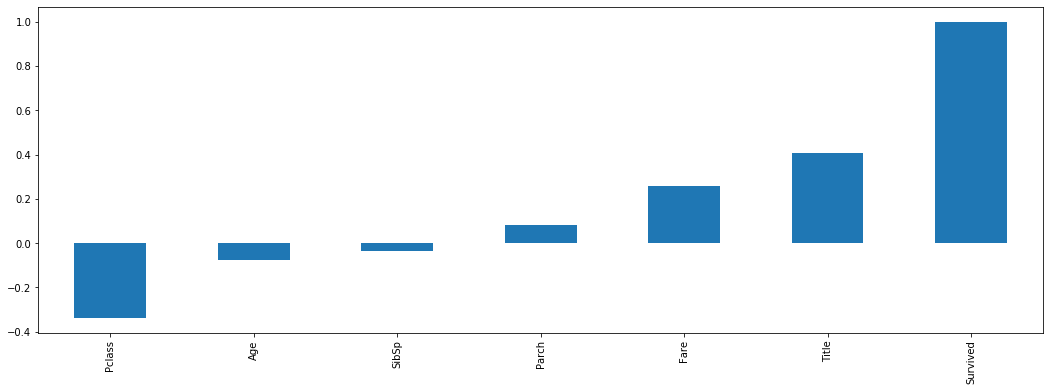

In [18]:
train.corr()['Survived'].sort_values().plot(kind='bar', figsize=(18, 6))

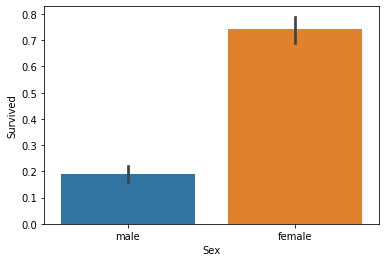

In [19]:
import seaborn as sns
sns.barplot(x='Sex',y='Survived',data=train)

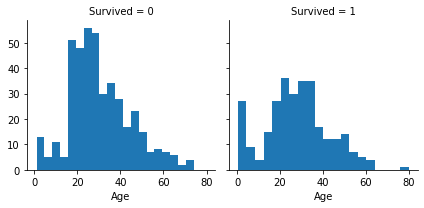

In [20]:
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=20)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


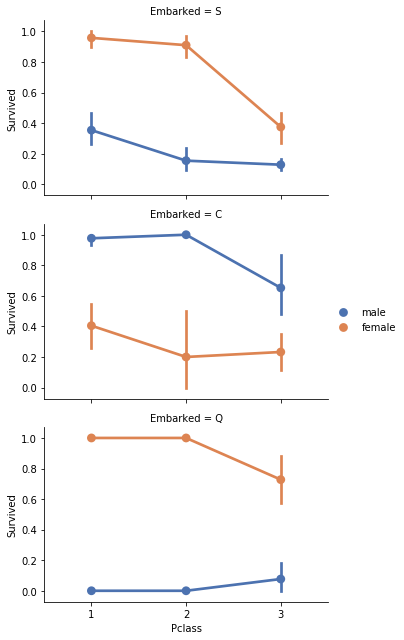

In [21]:
grid=sns.FacetGrid(train,row='Embarked',aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


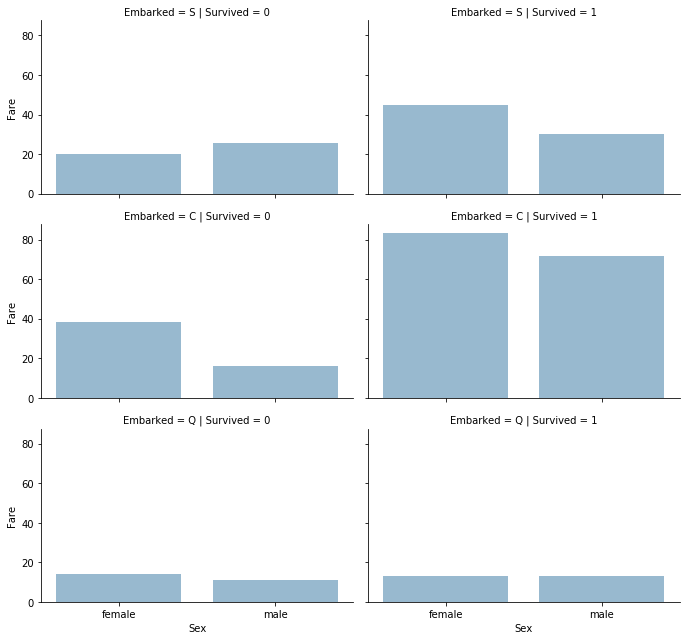

In [22]:
grid=sns.FacetGrid(train,row='Embarked',col='Survived',aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=0.5,ci=None)
grid.add_legend()

In [23]:
train=train.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'],axis=1)
train.shape
#test.shape

KeyError: "['Ticket'] not found in axis"

In [5]:
test.shape

(418, 10)

#### Working on Name column

In [16]:
##Working on the Name column
##Change the column to titles then to numrical values
titles={'Mr':1,'Miss':2 ,'Mrs':3 ,'Master':4,'Other':5}
#Extract and replace titles
for dataset in both_datasets:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
    


for dataset in both_datasets:
    dataset['Title']=dataset['Title'].replace(['Dona','Don', 'Rev', 'Dr',
       'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess',
       'Jonkheer'],'Other')
    dataset['Title']=dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    dataset['Title']=dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
dataset['Title'].unique()    

array([1, 3, 2, 4, 5], dtype=int64)

In [17]:
train=train.drop(['Name','PassengerId'],axis=1)
test=test.drop(['Name'],axis=1)
both_datasets=[train,test]
print(train.shape)
test.shape

(891, 10)


(418, 10)

In [15]:
both_datasets=[train,test]

#### Working on Sex feature

In [24]:
##Working on the Sex column
train['Sex']=pd.get_dummies(train['Sex'])
test['Sex']=pd.get_dummies(test['Sex'])
print(train['Sex'].unique())
test['Sex'].unique()

[0 1]


array([0, 1], dtype=uint64)

#### Working on Embarked feature

In [ ]:
#Since S is the most common one replace the missing values with that

##Dealing with Embarked missing values
train['Embarked'].describe()
#train['Embarked'].fillna('S',inplace=True)
#train['Embarked'].isnull().sum()

In [25]:

#train['Embarked']=pd.get_dummies(train['Embarked'])
#train[(train['Embarked'] == 'C')]['Embarked'].value_counts()

for dataset in both_datasets:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [26]:
for dataset in both_datasets:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,NaN,0,1
1,1,1,1,38.0,1,0,71.2833,C85,1,3
2,1,3,1,26.0,0,0,7.9250,NaN,0,2
3,1,1,1,35.0,1,0,53.1000,C123,0,3
4,0,3,0,35.0,0,0,8.0500,NaN,0,1


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null uint8
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int32
Title          418 non-null int64
dtypes: float64(2), int32(1), int64(5), object(1), uint8(1)
memory usage: 28.2+ KB


#### Working on Fare variable

In [29]:
test['Fare'].fillna(test['Fare'].dropna().median(),inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,NaN,2,1
1,893,3,1,47.0,1,0,7.0000,NaN,0,3
2,894,2,0,62.0,0,0,9.6875,NaN,2,1
3,895,3,0,27.0,0,0,8.6625,NaN,0,1
4,896,3,1,22.0,1,1,12.2875,NaN,0,3


In [30]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
test.head()

In [31]:
for dataset in both_datasets:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train=train.drop(['FareBand'],axis=1)
both_datasets=[train,test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,0,NaN,0,1
1,1,1,1,38.0,1,0,3,C85,1,3
2,1,3,1,26.0,0,0,1,NaN,0,2
3,1,1,1,35.0,1,0,3,C123,0,3
4,0,3,0,35.0,0,0,1,NaN,0,1


#### Working on age 

In [32]:
#Working on the age feature
guess_ages = np.zeros((2,3))
for dataset in both_datasets:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess=guess_df.median()
            #Convert random age float to nearest .5 age
            guess_ages[i,j]=int(age_guess/0.5 + 0.5) *0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex== i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
            
    dataset['Age']=dataset['Age'].astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22,1,0,0,NaN,0,1
1,1,1,1,38,1,0,3,C85,1,3
2,1,3,1,26,0,0,1,NaN,0,2
3,1,1,1,35,1,0,3,C123,0,3
4,0,3,0,35,0,0,1,NaN,0,1


In [33]:
train['AgeGroup']=pd.cut(train['Age'],5)
train[['AgeGroup','Survived']].groupby(['AgeGroup'],as_index=False).mean().sort_values(['Survived'],ascending=False)

for dataset in both_datasets:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<= 32),'Age']=1
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<= 48),'Age']=2
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<= 64),'Age']=3
    dataset.loc[dataset['Age']>64,'Age']
train.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeGroup
0,0,3,0,1,1,0,0,NaN,0,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,3,C85,1,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,1,NaN,0,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,3,C123,0,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,1,NaN,0,1,"(32.0, 48.0]"


In [34]:
train=train.drop(['AgeGroup'],axis=1)
both_datasets=[train,test]

##### Combining Parch and SibSp to family

In [35]:
for dataset in both_datasets:
    dataset['Family']= dataset['SibSp']+dataset['Parch'] + 1
train[['Family','Survived']].groupby(['Family'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [36]:
for dataset in both_datasets:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Family'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [37]:
train = train.drop(['Parch', 'SibSp', 'Family'], axis=1)
test = test.drop(['Parch', 'SibSp', 'Family'], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone
0,0,3,0,1,0,NaN,0,1,0
1,1,1,1,2,3,C85,1,3,0
2,1,3,1,1,1,NaN,0,2,1
3,1,1,1,2,3,C123,0,3,0
4,0,3,0,2,1,NaN,0,1,1


In [39]:
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone
0,0,3,0,1,0,NaN,0,1,0
1,1,1,1,2,3,C85,1,3,0
2,1,3,1,1,1,NaN,0,2,1
3,1,1,1,2,3,C123,0,3,0
4,0,3,0,2,1,NaN,0,1,1


#### Working on Cabin feature

In [ ]:
train['Cabin'].unique()

In [40]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8}

train['Cabin'] =train['Cabin'].fillna("H0")
train['Deck'] =  train['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train['Deck'] =  train['Deck'].map(deck)
train['Deck'] =  train['Deck'].fillna(0)
train['Deck'] =  train['Deck'].astype(int)
# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Deck
0,0,3,0,1,0,0,1,0,8
1,1,1,1,2,3,1,3,0,3
2,1,3,1,1,1,0,2,1,8
3,1,1,1,2,3,0,3,0,3
4,0,3,0,2,1,0,1,1,8


In [41]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8}

test['Cabin'] =test['Cabin'].fillna("H0")
test['Deck'] =  test['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
test['Deck'] =  test['Deck'].map(deck)
test['Deck'] =  test['Deck'].fillna(0)
test['Deck'] =  test['Deck'].astype(int)
# we can now drop the cabin feature
test = test.drop(['Cabin'], axis=1)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Deck
0,0,3,0,1,0,0,1,0,8
1,1,1,1,2,3,1,3,0,3
2,1,3,1,1,1,0,2,1,8
3,1,1,1,2,3,0,3,0,3
4,0,3,0,2,1,0,1,1,8


In [42]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Deck
0,892,3,0,2,0,2,1,1,8
1,893,3,1,2,0,0,3,0,8
2,894,2,0,3,1,2,1,1,8
3,895,3,0,1,1,0,1,1,8
4,896,3,1,1,1,0,3,0,8


## MODELLING

In [43]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [44]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
#Logistic Regression

logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train,Y_train)*100,2)
acc_log

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


78.0

In [47]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.146440
5,Title,0.431902
4,Embarked,0.289837
6,IsAlone,0.096192
2,Age,-0.034285
3,Fare,-0.034502
7,Deck,-0.098639
0,Pclass,-0.810042


In [48]:
## K-NN Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.2

In [49]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

75.31

In [50]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

69.58

In [51]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.34

In [52]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.34

In [55]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('C:\\Users\\hp\\Documents\\Pytorch_Notebooks\\Projects\\TitanicProject\\titanic\\submission.csv', index=False)